<h1 align=center>Heart Disease Prediction Project</h1>

---

<h2 align=center>Why Heart Disease Prediction?</h2>
<p>
    Heart disease is one of the leading causes of mortality worldwide. Early prediction of heart disease can save lives by enabling timely medical intervention. This project demonstrates the use of machine learning to analyze patient data and predict the likelihood of heart disease. It highlights the importance of leveraging data-driven approaches to enhance healthcare decision-making. By working on this project, one can gain valuable insights into data analysis, feature engineering, and model evaluation while contributing to societal well-being.
</p>

<style>
    h1:hover {
        color: cyan;
        text-shadow: 0 0 10px cyan, 0 0 20px cyan, 0 0 30px cyan, 0 0 40px cyan;
        transition: text-shadow 0.3s ease;
}
    h2:hover {
        color: red;
        text-shadow: 0 0 10px red, 0 0 20px red, 0 0 30px black, 0 0 40px red;
        transition: text-shadow 0.3s ease;
}
    p:hover {
        color:white;
        text-shadow: 0 0 2px grey, 0 0 2.4px black, 0 0 2.6px white, 0 0 2.8px black;
        transition: text-shadow 9s ease;
    }
</style>

<p class="info">Project Type - Machine Learning</p>
<p class="hidden-text">Supervised Learning (Classification)</p>

<p class="info">Contribution - Kushang Shah</p>
<p class="hidden-text">Individual</p>

<style>
    .info {
        color: grey;
        transition: color 1s ease;
    }

    .info:hover {
        color: white;
    }

    .hidden-text {
        display: none;
        color: white;
        font-weight: bold;
        margin-left: 20px;
        white-space: nowrap;
        overflow: hidden;
        width: 0; /* Initially, set the width to 0 */
        transition: width 1s ease-in-out, opacity 1s ease-in-out;
    }

    .info:hover + .hidden-text {
        display: inline-block;
        width: auto; /* Set width to auto */
        opacity: 1; /* Make the hidden text visible */
    }

    @keyframes slide-in-left {
        from {
            transform: translateX(-100%);
        }
        to {
            transform: translateX(0);
        }
    }

    @keyframes slide-out-right {
        from {
            transform: translateX(0);
        }
        to {
            transform: translateX(100%);
        }
    }

    .info:hover + .hidden-text {
        animation: slide-in-left 1s forwards;
    }

    .info:not(:hover) + .hidden-text {
        animation: slide-out-right 1s forwards;
    }
</style>


<h1 align=center>Step 1: Importing Libraries</h1>
<style>
    h1 {
        color:rgba(200, 190, 180);
    }
    h1:hover {
        color:white;
        transition:2s ease
    }
</style>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Step 2: Importing Data

In [11]:
df = pd.read_csv("cleaned_merged_heart_dataset.csv")

## Step 3: Exploratory Data Analysis (EDA)

In [12]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [15]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00
mean,54.35,0.69,1.28,131.55,246.86,0.15,0.60,149.42,0.33,1.05,1.42,0.73,2.66,0.52
std,9.08,0.46,1.28,17.56,51.61,0.36,0.64,23.01,0.47,1.16,0.62,1.02,1.25,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.75,0.00,0.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,241.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,276.00,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,4.00,7.00,1.00


<h1 align="left">From the Dataset:</h1>
<p align=center>
This dataset contains 1,888 records. It includes 14 column that are crucial for predicting heart attack and stroke risks, covering both medical and demographic factors. Below is a detailed description of each feature.
</P>
<p>
    <span class="line">1. age: Age of the patient (Numeric).</span><br>
    <span class="line">2. sex: Gender of the patient. Values: 1 = male, 0 = female.</span><br>
    <span class="line">3. cp: Chest pain type. Values: 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic.</span><br>
    <span class="line">4. trestbps: Resting Blood Pressure (in mm Hg) (Numeric).</span><br>
    <span class="line">5. chol: Serum Cholesterol level (in mg/dl) (Numeric).</span><br>
    <span class="line">6. fbs: Fasting blood sugar > 120 mg/dl. Values: 1 = true, 0 = false.</span><br>
    <span class="line">7. restecg: Resting electrocardiographic results. Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy.</span><br>
    <span class="line">8. thalach: Maximum heart rate achieved (Numeric).</span><br>
    <span class="line">9. exang: Exercise-induced angina. Values: 1 = yes, 0 = no.</span><br>
    <span class="line">10. oldpeak: ST depression induced by exercise relative to rest (Numeric).</span><br>
    <span class="line">11. slope: Slope of the peak exercise ST segment. Values: 0 = Upsloping, 1 = Flat, 2 = Downsloping.</span><br>
    <span class="line">12. ca: Number of major vessels (0-3) colored by fluoroscopy. Values: 0, 1, 2, 3.</span><br>
    <span class="line">13. thal: Thalassemia types. Values: 1 = Normal, 2 = Fixed defect, 3 = Reversible defect.</span><br>
    <span class="line">14. target: Outcome variable (heart attack risk). Values: 1 = more chance of heart attack, 0 = less chance of heart attack.</span><br>
</p>

<style>
    h1 {
        color:rgb(235, 227, 220);
    }

    h1:hover {
        color:rgb(255, 255, 254):
    }

    p:hover{
        color:cyan;
    }

    .line {
        display: block;
        color: rgb(209, 197, 186);
        transition: color 0.3s ease;
        margin: 1.5px 0; 
    }

    .line:hover {
        color: red;
    }

    .line:nth-of-type(odd):hover {
        color: rgb(161, 201, 236);
    }

    .line:nth-of-type(even):hover {
        color: rgb(175, 242, 201);
    }

    p {
        line-height: 1.2; /* Reduce overall line spacing */
    }
</style>


### checking for null/missing or another missing values

In [20]:
# Checking for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Graphs

1:more chances of heart attack<br>
0:less chances of heart attack

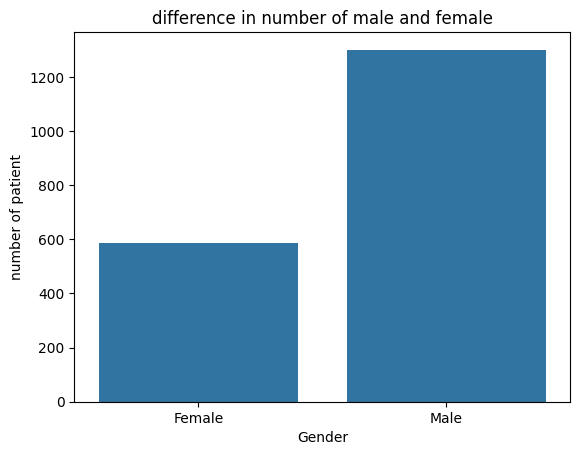

In [51]:
# checking number of male and female
sns.barplot(x=df['sex'].value_counts().index, y=df['sex'].value_counts())
plt.xlabel('Gender')
plt.ylabel("number of patient")
plt.title("difference in number of male and female")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

Number of Male: 1300<br>
Number of Female: 588<br>
<br>
This are the total number of patients, now we gonna see how many of them has chances for heart attack

In [52]:
# Checking how many number of patients has chances for heart attack
gender_target = df.groupby(['sex', 'target']).size().unstack()

gender_target

target,0,1
sex,,
0,198,390
1,713,587


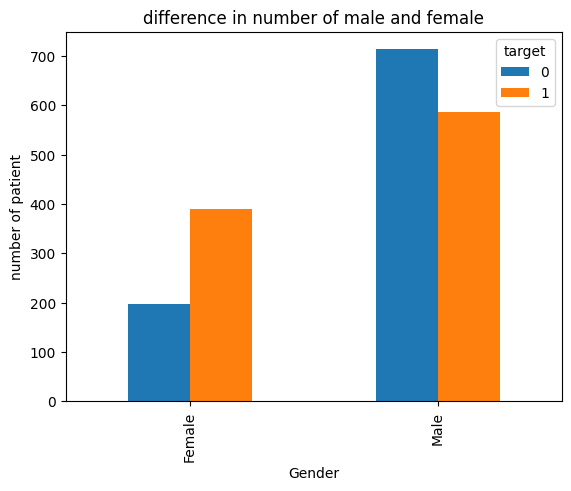

In [ ]:
gender_target.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel("number of patient")
plt.title("Chances of heart attack")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

<br>
<h2>Chest Pain</h2>
<p>
In Heart Attack scenario chest pain is the most crucial part.
</p>

<style>
    h2:hover {
        color: rgb(249, 118, 106);
    }
    p:hover {
        color: cyan;
    }
</style>

In [74]:
# checking how many patient got which type of chest pain
chest_pain = df.groupby(['sex', 'cp']).size().unstack()
chest_pain

cp,0,1,2,3,4
sex,,,,,
0,207,97,195,54,35
1,559,194,304,148,95


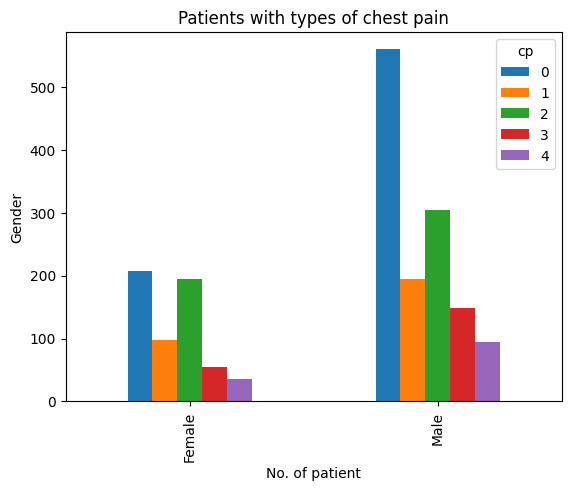

In [80]:
chest_pain.plot(kind='bar')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel("No. of patient")
plt.ylabel("Gender")
plt.title("Patients with types of chest pain")
plt.show()

<p align=center>
As the number increases in chart's legend, danger increases
</p>

<style>
    p {
        color: white;
    }
    p:hover {
        color: rgb(252, 70, 70);
        transition:5s ease;
    }

</style>

In [84]:
# cheacking the number of major vessels which are coloured by fluroscopy
df['ca'].unique()

array([0, 2, 1, 3, 4])

In [88]:
vessels_by_fluroscopy = df.groupby(['sex', 'ca']).size().unstack()
vessels_by_fluroscopy

ca,0,1,2,3,4
sex,,,,,
0,367,88,75,22,1
1,655,292,139,92,27


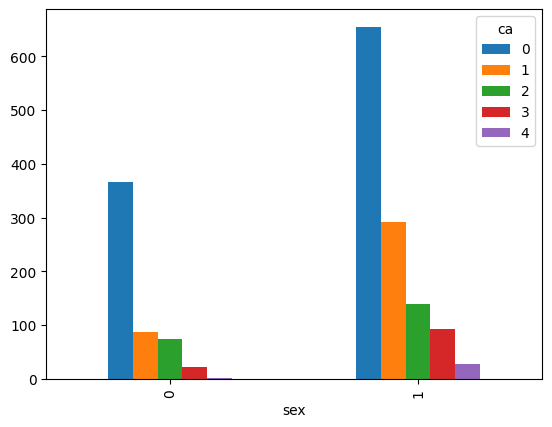

In [89]:
vessels_by_fluroscopy.plot(kind='bar')
plt.show()

## Heatmap

Cheacking if Chest pain and Vessel colour has anything to do with Target(Chances of getting heart attack.)

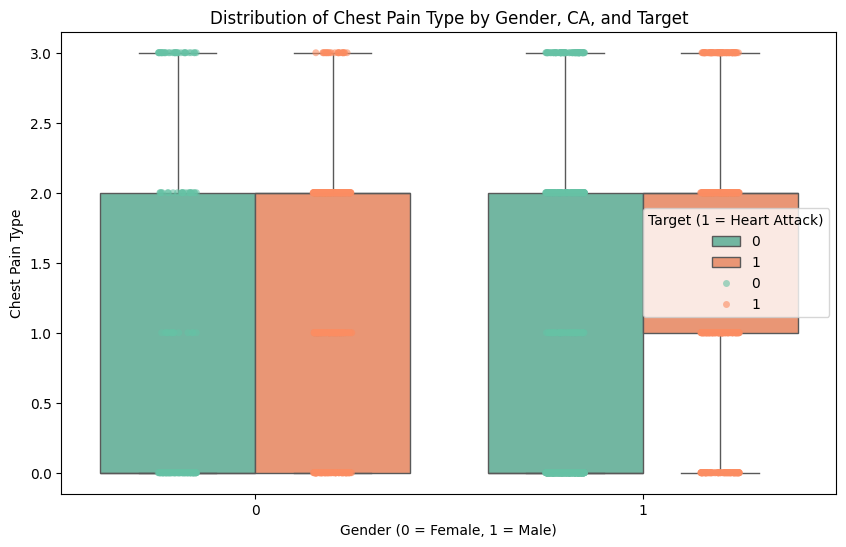

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='cp', hue='target', palette='Set2')
sns.stripplot(data=df, x='sex', y='cp', hue='target', dodge=True, alpha=0.6, jitter=True, palette='Set2')
plt.title('Distribution of Chest Pain Type by Gender, CA, and Target')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Chest Pain Type')
plt.legend(title='Target (1 = Heart Attack)')
plt.show()

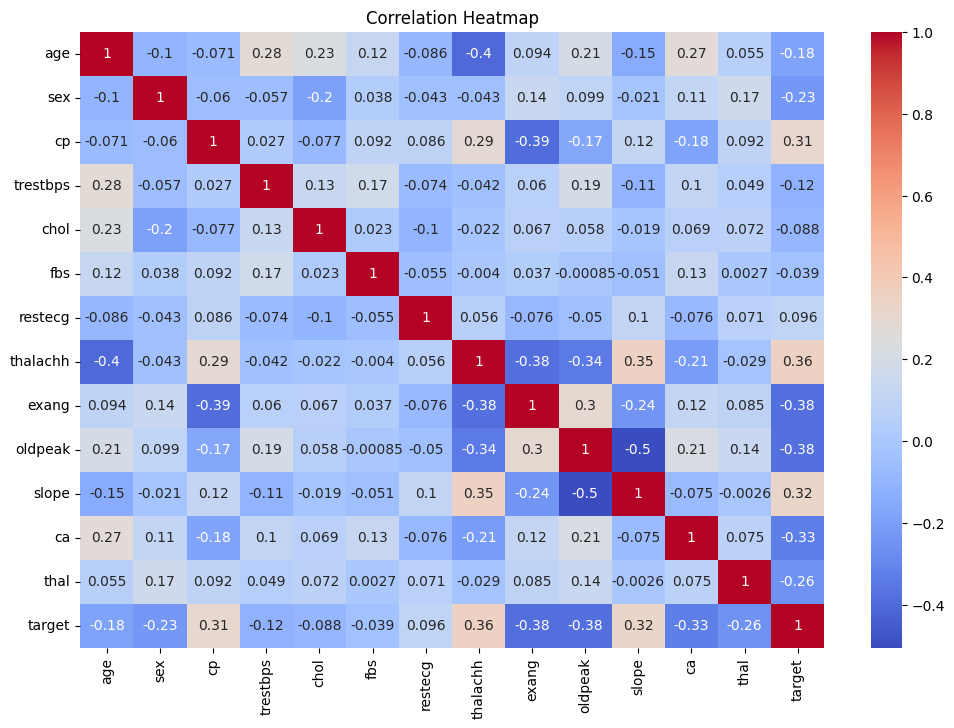

In [92]:

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Step 4: Data Preprocessing

In [ ]:
# Splitting features and target
X = data.drop(columns=['target'])
y = data['target']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 5: Model Selection and Training

In [ ]:
# Using RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Importance of Making a Heart Disease Prediction

Machine learning models like the one demonstrated here can assist healthcare professionals by providing a second opinion based on patient data. This can:

1. Improve diagnosis accuracy.
2. Enable early detection, reducing severe outcomes.
3. Optimize resource allocation in healthcare facilities.
4. Foster research in predictive analytics for various diseases.

This project underscores the transformative role of technology in modern medicine.